# Dataset 3 : AWS SaaS Sales
1. Dataset dapat di download pada link berikut ini.
2. Jangan lupa untuk melakukan data cleaning sebelum lanjut ke tahapan analisis.
3. Siapa stakeholders pada masalah tersebut
4. Laporkan kepada user tentang hal-hal berikut ini :
  - Jumlah order di setiap bulan di tahun 2022 dan 2023.
  - Top 10 Negara asal pembeli.
  - Top 10 Customers.
  - Total sales tertinggi dan terendah (Bulan dan Tahun).
  - Product dengan discount > 50%.
  - Segment & Product yang paling untung & rugi.
  - Negara penghasil profit tertinggi.
  - Periode waktu yang memberikan kerugian pada perusahaan.
5. Buatlah kesimpulan dan rekomendasi dari temuan yang didapatkan. Selain pertanyaan user yang wajib dijawab, lakukan juga analisis tambahan sehingga dapat memberikan kesimpulan yang lebih banyak.

# Oleh Kelompok A:
1. Akbar
2. Ami
3. Dyah
4. Ken
5. Rangga
6. Zahra

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#Names of the entries in the directory given by path
print(os.listdir())

['.config', 'sample_data']


### No.1
Read dataset csv

In [ ]:
aws_df = pd.read_csv("/content/drive/MyDrive/Kelompok A (Aws) 🌒/SaaS-Sales.csv")
aws_df.head()

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
aws_df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [ ]:
aws_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [ ]:
aws_df.value_counts()

Row ID  Order ID          Order Date  Date Key  Contact Name      Country        City         Region  Subregion  Customer                Customer ID  Industry           Segment     Product              License     Sales    Quantity  Discount  Profit   
1       EMEA-2022-152156  11/9/2022   20221109  Nathan Bell       Ireland        Dublin       EMEA    UKIR       Chevron                 1017         Energy             SMB         Marketing Suite      16GRM07R1K  261.960  2         0.0        41.9136     1
6666    APJ-2022-115483   7/15/2022   20220715  Emily Ross        Japan          Tokyo        APJ     JAPN       American Express        1005         Finance            SMB         Support              Y8TULY7XSD  219.840  5         0.2        79.6920     1
6659    AMER-2023-135937  2/21/2023   20230221  Sue Parsons       Chile          Puente Alto  AMER    LATAM      Walt Disney             1097         Communications     Enterprise  SaaS Connector Pack  OL8LUB2422  68.704   2       

### Detecting missing value

In [ ]:
missing_value = ["N/a","na",np.nan]
aws_df = pd.read_csv("/content/drive/MyDrive/Kelompok A (Aws) 🌒/SaaS-Sales.csv", na_values=missing_value)

In [ ]:
#Check missing value
aws_df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
aws_df.isnull().any()

Row ID          False
Order ID        False
Order Date      False
Date Key        False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Customer ID     False
Industry        False
Segment         False
Product         False
License         False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [ ]:
#Check Duplicate
aws_df.duplicated().sum()

0

In [ ]:
#Check Outliers
outliers = aws_df[np.abs(aws_df.Sales - aws_df.Sales.mean()) > (3*aws_df.Sales.std())]
outliers

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
27,28,EMEA-2021-150630,9/17/2021,20210917,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,F8G07TWQ17,3083.430,7,0.5,-1665.0522
165,166,APJ-2020-139892,9/8/2020,20200908,Melanie Davidson,Japan,Osaka,APJ,JAPN,Nissan Motor,1098,Transportation,SMB,Big Ol Database,SKNAWPG4VV,8159.952,8,0.4,-1359.9920
251,252,AMER-2022-145625,9/12/2022,20220912,Penelope Nash,United States,Seattle,AMER,NAMER,Home Depot,1047,Retail,SMB,Data Smasher,4LV39UJCC2,3347.370,13,0.0,636.0003
262,263,APJ-2020-106992,9/19/2020,20200919,Charles Hart,Japan,Tokyo,APJ,JAPN,HonHai Precision Industry,1033,Tech,Strategic,Big Ol Database,3IGE4YNMM4,3059.982,3,0.4,-509.9970
263,264,APJ-2020-106992,9/19/2020,20200919,Charles Hart,Japan,Tokyo,APJ,JAPN,HonHai Precision Industry,1033,Tech,Strategic,Big Ol Database,E34U2SY5LB,2519.958,7,0.4,-251.9958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,9742,EMEA-2021-117086,11/8/2021,20211108,Pippa Hunter,Egypt,Cairo,EMEA,MEA,Samsung Electronics,1015,Tech,Strategic,Marketing Suite,OO12JK36OM,4404.900,5,0.0,1013.1270
9774,9775,APJ-2020-169019,7/26/2020,20200726,Lily Bond,Japan,Osaka,APJ,JAPN,Bosch,1076,Tech,SMB,ContactMatcher,FT1VQ5PHAG,2177.584,8,0.8,-3701.8928
9857,9858,AMER-2021-164301,3/26/2021,20210326,Dominic Hill,Canada,Toronto,AMER,NAMER,Siemens,1043,Manufacturing,Strategic,ContactMatcher,BDVMP1KIT9,3393.680,8,0.0,610.8624
9929,9930,AMER-2022-129630,9/5/2022,20220905,Boris Reid,United States,Los Angeles,AMER,NAMER,Huawei,1086,Tech,SMB,Alchemy,Q89OX8MVC3,2799.960,5,0.2,944.9865


<Axes: >

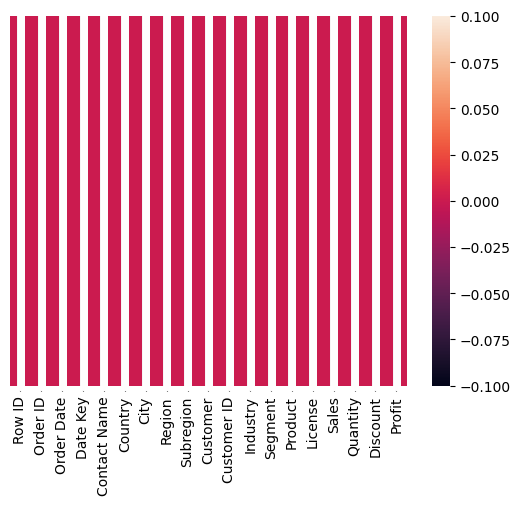

In [ ]:
#Black meaning good data
sns.heatmap(aws_df.isnull(), yticklabels=False, annot=True)

### No.2
Jangan lupa untuk melakukan data cleaning sebelum lanjut ke tahapan analisis.

### Data Cleaning 

Missing value gaada, gangerti apa yg harus di cleaning...   
terus kan ada outlier 127, mau di drop apa gimana?....
😵‍💫😵‍💫🤑   
Terus inikan ada heatmap, warnanya merah semua...

### Drop?

### Fill?

### No.3
Siapa stakeholders pada masalah tersebut?

Stakeholders for Amazon Web Services (AWS) Software as a Service (SaaS) sales, there could be several categories of stakeholders involved. These could include:

1. **AWS leadership and employees**: These are people who work directly on developing, selling, and supporting AWS SaaS products.

2. **Amazon shareholders**: As Amazon is a publicly-traded company, shareholders have a stake in the financial success of its ventures, including AWS 

3. **Customers**: This includes businesses and individuals who purchase and use AWS SaaS products. They have a stake in the quality, reliability, pricing, and ongoing development of these products.

4. **Partners**: These are other businesses that work with Amazon to either sell or provide added value to AWS SaaS products. They might include consulting partners, technology partners, resellers, managed services providers, etc.

5. **Regulatory bodies**: These are government or industry organizations that regulate aspects of AWS' business, like data privacy, financial reporting, etc.

6. **Competitors**: Other cloud service providers might be considered stakeholders as their actions and strategies could affect AWS' strategies and vice versa.

7. **Community**: This can include local communities where Amazon has offices or data centers. The wider tech community, and the public.

### No.4
Laporkan kepada user tentang hal-hal berikut ini :

➡️ Jumlah order di setiap bulan di tahun 2022 dan 2023.

In [ ]:
#Convert 'Order Date' column to datetime
aws_df['Order Date'] = pd.to_datetime(aws_df['Order Date'])
aws_df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [ ]:
#Filter 2022 & 2023
#aws_df = aws_df[(aws_df['Order Date'].dt.year == 2022) | (aws_df['Order Date'].dt.year == 2023)]

aws_df = aws_df[(aws_df['Order Date'].dt.year == 2022) | (aws_df['Order Date'].dt.year == 2023)]
aws_df = aws_df.drop_duplicates(subset=['Order ID'])
aws_df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.960,2,0.0,41.9136
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.620,2,0.0,6.8714
12,13,EMEA-2023-114412,2023-04-16,20230416,Adrian Hunter,Sweden,Stockholm,EMEA,NOR,Engie,1062,Energy,SMB,Support,FE5QJBIUN1,15.552,3,0.2,5.4432
13,14,AMER-2022-161389,2022-12-06,20221206,Adrian Abraham,Canada,Toronto,AMER,NAMER,Microsoft,1066,Tech,SMB,ContactMatcher,COK66F8IC1,407.976,3,0.2,132.5922
21,22,AMER-2022-137330,2022-12-10,20221210,Melanie Sharp,Costa Rica,San José,AMER,LATAM,Carrefour,1048,Retail,Strategic,ChatBot Plugin,B83G92QX65,19.460,7,0.0,5.0596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,AMER-2022-157728,2022-09-23,20220923,Rebecca Dickens,Brazil,São Paulo,AMER,LATAM,Amazon,1004,Tech,SMB,Support,A3XS9BYHG8,35.560,7,0.0,16.7132
9986,9987,AMER-2022-125794,2022-09-30,20220930,Lucas Oliver,United States,New York City,AMER,NAMER,Panasonic,1091,Tech,SMB,Data Smasher,PO8DG1HX3V,36.240,1,0.0,15.2208
9987,9988,EMEA-2023-163629,2023-11-18,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Data Smasher,GGI2WZG0KP,79.990,1,0.0,28.7964
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332


In [ ]:
#Count order 2022 & 2023
orders_per_month = aws_df.groupby(aws_df['Order Date'].dt.to_period('M')).size()
orders_per_month

Order Date
2022-01     89
2022-02     82
2022-03    161
2022-04    170
2022-05    222
2022-06    202
2022-07    199
2022-08    180
2022-09    362
2022-10    190
2022-11    373
2022-12    350
2023-01    162
2023-02    105
2023-03    227
2023-04    198
2023-05    260
2023-06    234
2023-07    226
2023-08    218
2023-09    463
2023-10    302
2023-11    447
2023-12    477
Freq: M, dtype: int64

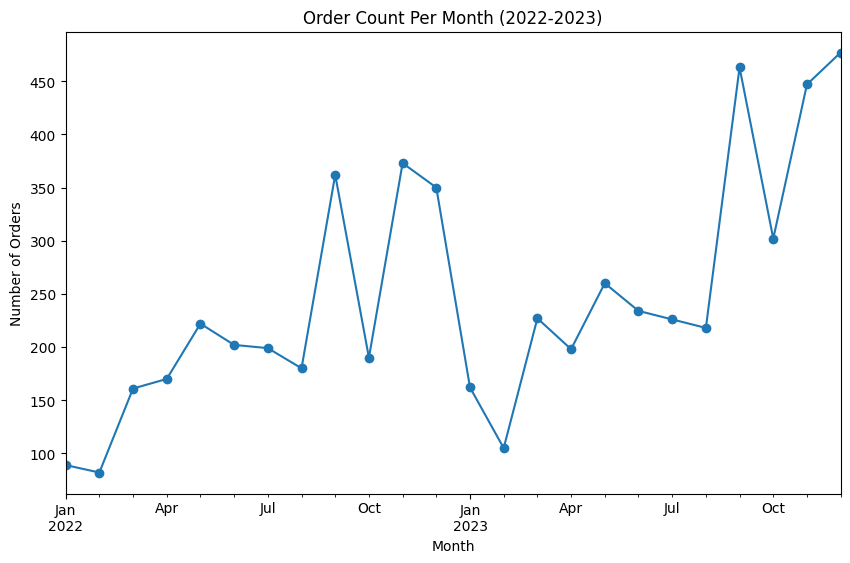

In [ ]:
#Visual

#Plotting the data
plt.figure(figsize=(10, 6)) #Figure size
orders_per_month.plot(kind='line', marker='o') #Plotting as a line plot with marker

#Setting title and labels
plt.title('Order Count Per Month (2022-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

➡️ Top 10 Negara asal pembeli.

In [ ]:
top_10_countries = aws_df['Country'].value_counts().head(10)
top_10_countries = top_10_countries.drop_duplicates(subset=["Order ID"])
top_10_countries

TypeError: ignored

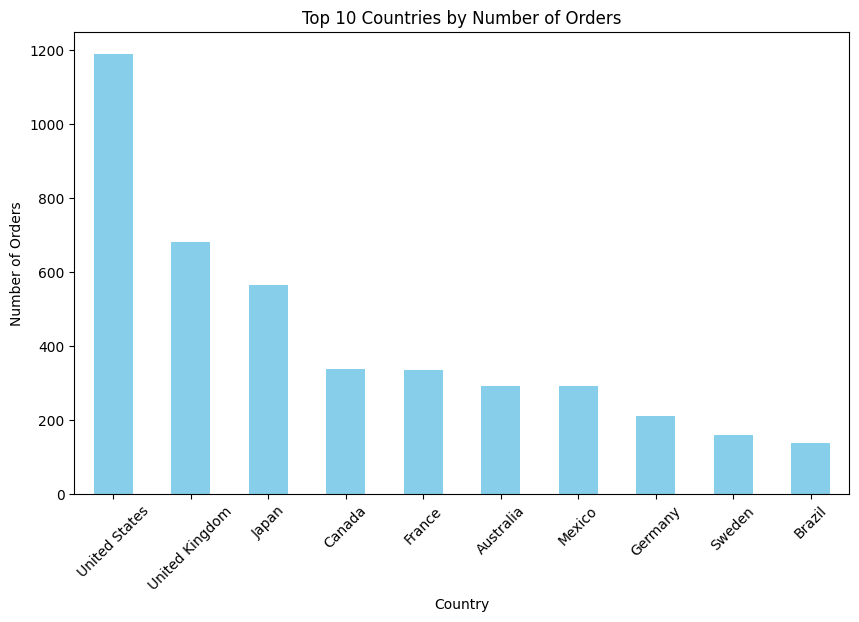

In [ ]:
#Visual

plt.figure(figsize=(10, 6)) #Figure size
top_10_countries.plot(kind='bar', color='skyblue') #Bar plot

plt.title('Top 10 Countries by Number of Orders') #Title
plt.xlabel('Country') #x-label
plt.ylabel('Number of Orders') #y-label
plt.xticks(rotation=45)
plt.show()


➡️ Top 10 Customers.

In [ ]:
top_10_customers = aws_df['Customer'].value_counts().head(10)
top_10_customers

Allianz                  128
Prudential Financial     118
Tyson Foods              104
Chevron                  100
Ford Motor                99
AmerisourceBergen         98
Comcast                   94
Bank of America Corp.     92
BNP Paribas               92
Walmart                   87
Name: Customer, dtype: int64

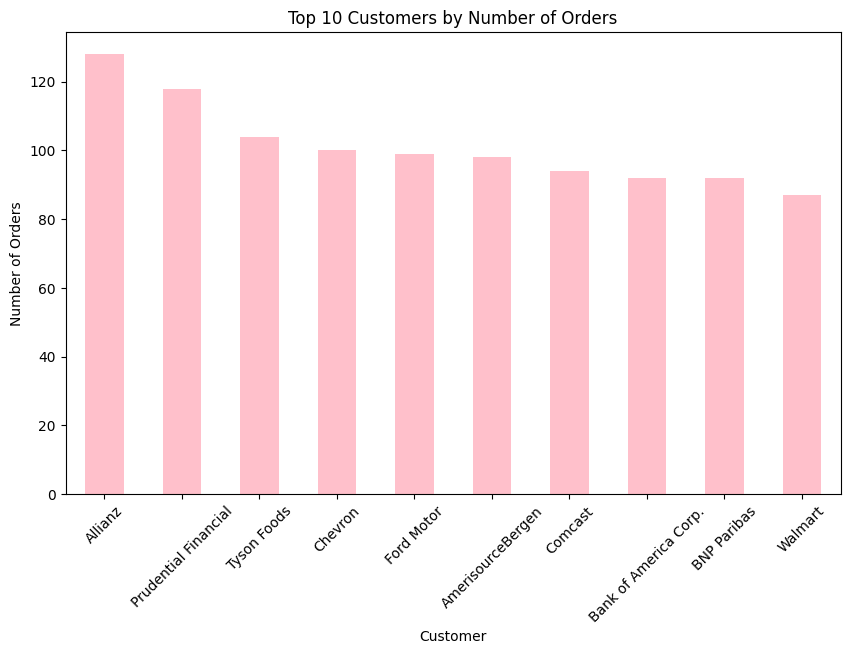

In [ ]:
#Visual

plt.figure(figsize=(10, 6)) #Figure size
top_10_customers.plot(kind='bar', color='pink') #Bar plot

plt.title('Top 10 Customers by Number of Orders') #Title
plt.xlabel('Customer') #x-label
plt.ylabel('Number of Orders') #y-label
plt.xticks(rotation=45)
plt.show()

➡️ Total sales tertinggi dan terendah (Bulan dan Tahun).

➡️ Product dengan discount > 50%.

➡️ Segment & Product yang paling untung & rugi.

➡️ Negara penghasil profit tertinggi.

In [ ]:
highest_profit_country = aws_df.groupby('Country')['Profit'].sum().idxmax()
highest_profit_country

'United States'

➡️ Periode waktu yang memberikan kerugian pada perusahaan.

### No.5
Buatlah kesimpulan dan rekomendasi dari temuan yang didapatkan. Selain pertanyaan user yang wajib dijawab, lakukan juga analisis tambahan sehingga dapat memberikan kesimpulan yang lebih banyak.

In [ ]:
print('hello world')

hello world
